In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wget
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from photutils.segmentation import detect_sources,detect_threshold,deblend_sources,SourceCatalog
from photutils.isophote import EllipseGeometry,Ellipse
from photutils.aperture import EllipticalAperture

In [3]:
RA=148.9650,213.0905
Dec=69.6791,8.6525

In [4]:
Fits = fits.open("cutout_213.0905_8.6525.fits")
Fits.info()

Filename: cutout_213.0905_8.6525.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (1024, 1024, 3)   float32   


In [5]:
Data=np.array(Fits[0].data)
Filtro_g=Data[0,:,:]
Filtro_r=Data[1,:,:]
Filtro_z=Data[2,:,:]

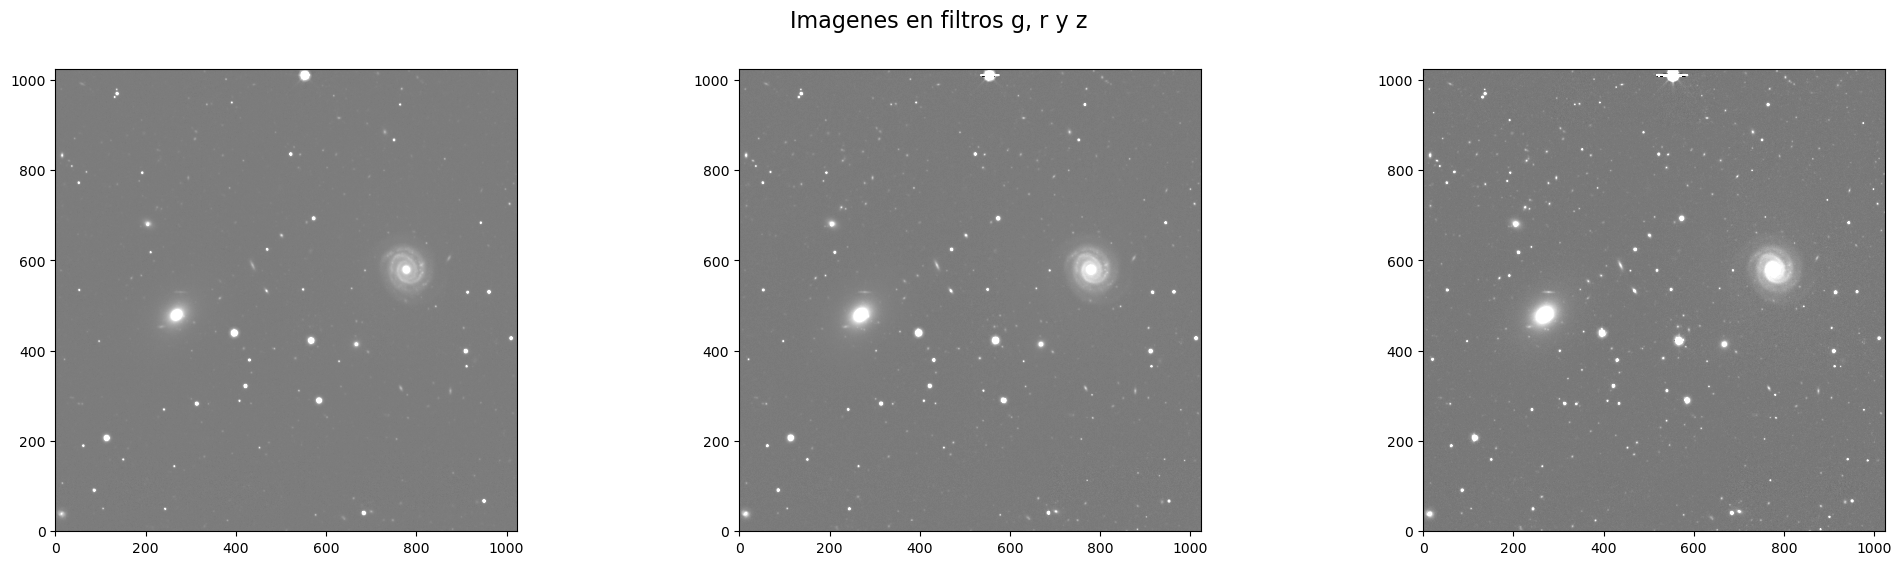

In [6]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
fig.suptitle('Imagenes en filtros g, r y z',x=0.5,fontsize=16)
ax[0].imshow(Filtro_g,cmap='gray',vmin=Filtro_g.mean()-Filtro_g.std(),vmax=Filtro_g.mean()+Filtro_g.std(),origin='lower')
ax[1].imshow(Filtro_r,cmap='gray',vmin=Filtro_r.mean()-Filtro_r.std(),vmax=Filtro_r.mean()+Filtro_r.std(),origin='lower')
ax[2].imshow(Filtro_z,cmap='gray',vmin=Filtro_z.mean()-Filtro_z.std(),vmax=Filtro_z.mean()+Filtro_z.std(),origin='lower')

In [7]:
threshold_g=detect_threshold(Filtro_g,3)
Fuentes_g= detect_sources(Filtro_g,threshold_g,npixels=10)
Catalogo_g=deblend_sources(Filtro_g,Fuentes_g,npixels=10,contrast=0.39,progress_bar=False)
threshold_r=detect_threshold(Filtro_r,3)
Fuentes_r= detect_sources(Filtro_r,threshold_r,npixels=10)
Catalogo_r=deblend_sources(Filtro_r,Fuentes_r,npixels=10,contrast=0.1,progress_bar=False)
threshold_z=detect_threshold(Filtro_z,3)
Fuentes_z= detect_sources(Filtro_z,threshold_z,npixels=10)
Catalogo_z=deblend_sources(Filtro_z,Fuentes_z,npixels=10,contrast=0.2,progress_bar=False)

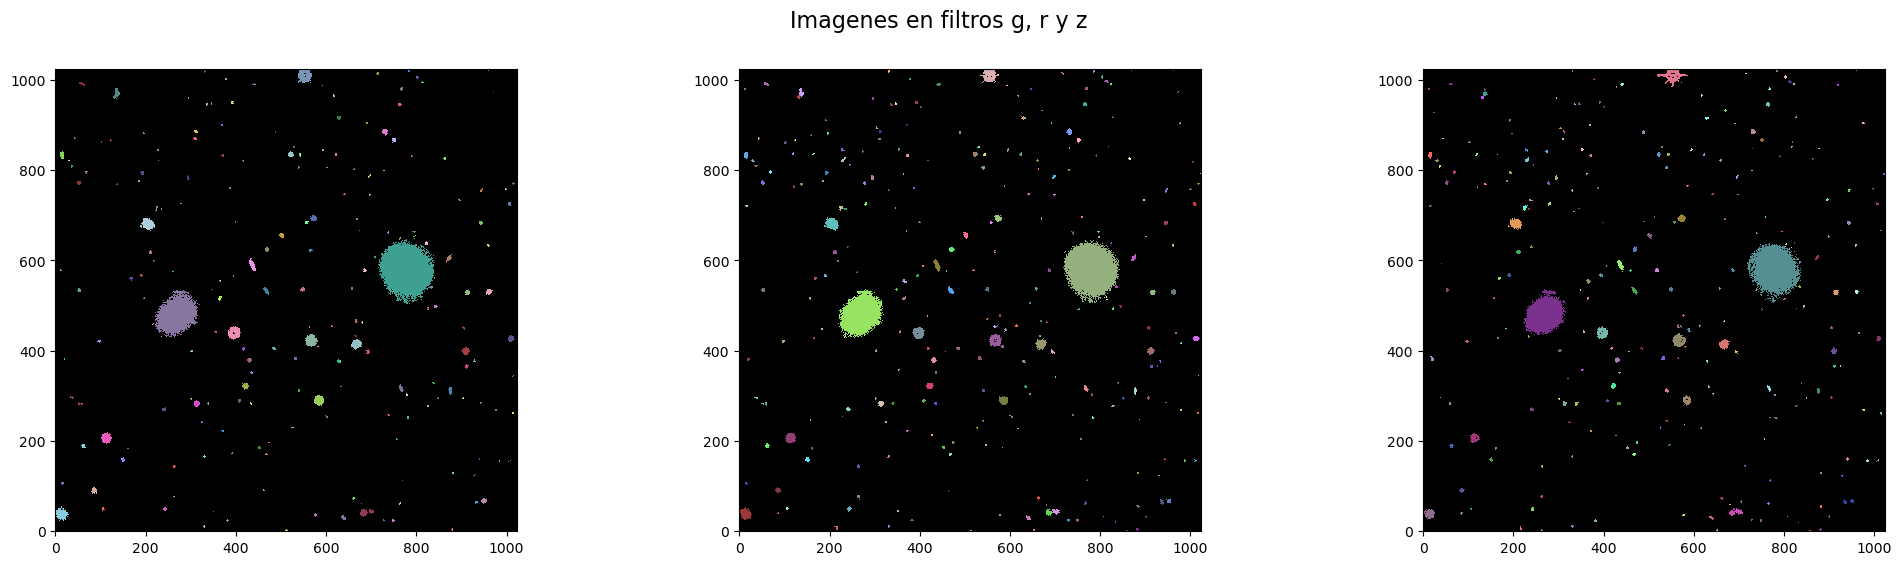

In [8]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
fig.suptitle('Imagenes en filtros g, r y z',x=0.5,fontsize=16)
ax[0].imshow(Catalogo_g,cmap=Catalogo_g.cmap,origin='lower',interpolation='nearest')
ax[1].imshow(Catalogo_r,cmap=Catalogo_r.cmap,origin='lower',interpolation='nearest')
ax[2].imshow(Catalogo_z,cmap=Catalogo_z.cmap,origin='lower',interpolation='nearest')

In [9]:
Estrellas=make_lupton_rgb(Filtro_z,Filtro_r,Filtro_g,Q=5,stretch=0.1,filename='Catalogo.jpeg')

In [11]:
Catg=SourceCatalog(Filtro_g,Catalogo_g)
Catr=SourceCatalog(Filtro_r,Catalogo_r)
Catz=SourceCatalog(Filtro_z,Catalogo_z)

In [12]:
tbl_g= Catg.to_table()
tbl_r= Catr.to_table()
tbl_z= Catz.to_table()

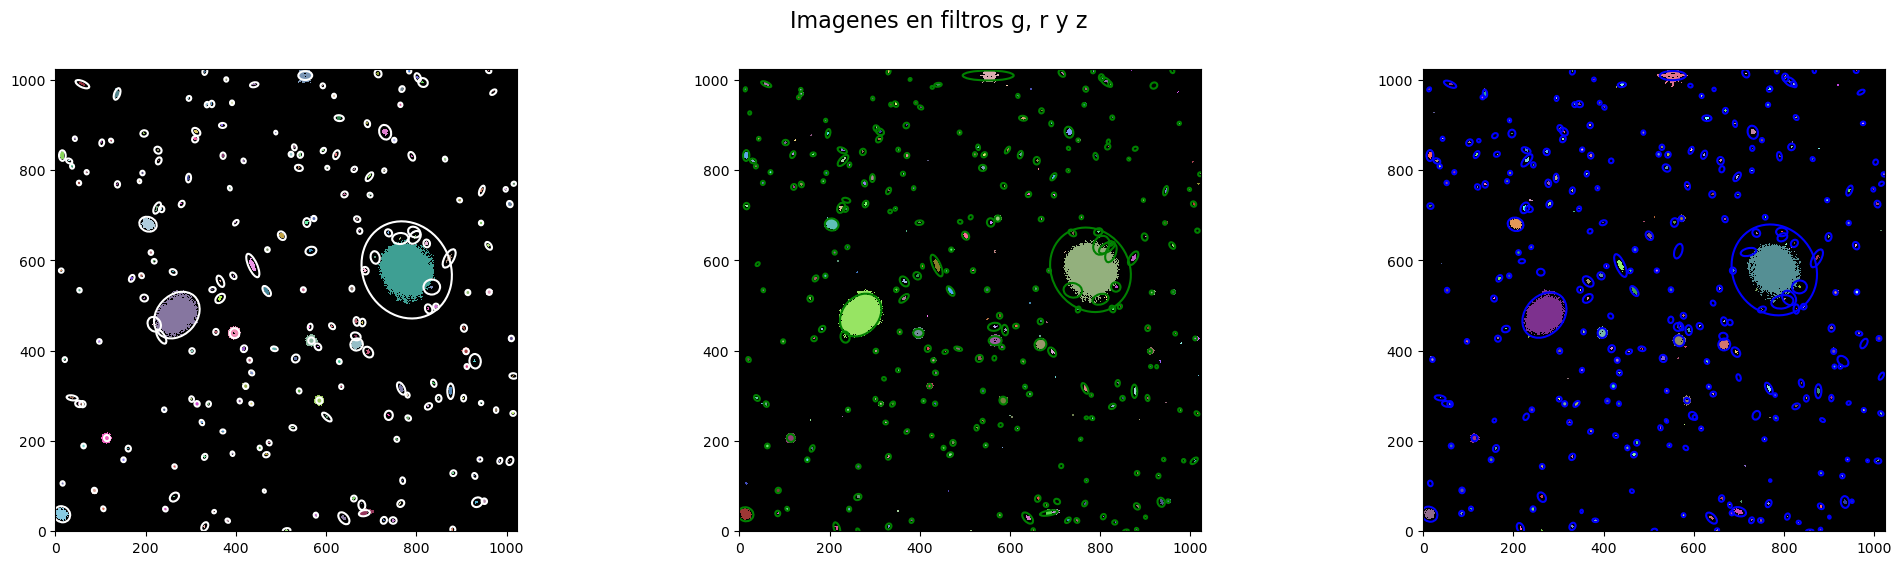

In [16]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
fig.suptitle('Imagenes en filtros g, r y z',x=0.5,fontsize=16)
ax[0].imshow(Catalogo_g,cmap=Catalogo_g.cmap,origin='lower',interpolation='nearest')
ax[1].imshow(Catalogo_r,cmap=Catalogo_r.cmap,origin='lower',interpolation='nearest')
ax[2].imshow(Catalogo_z,cmap=Catalogo_z.cmap,origin='lower',interpolation='nearest')
Catg.plot_kron_apertures(ax=ax[0],color='white', lw=1.5)
Catz.plot_kron_apertures(ax=ax[1],color='green', lw=1.5)
Catr.plot_kron_apertures(ax=ax[2],color='blue', lw=1.5)
plt.show()

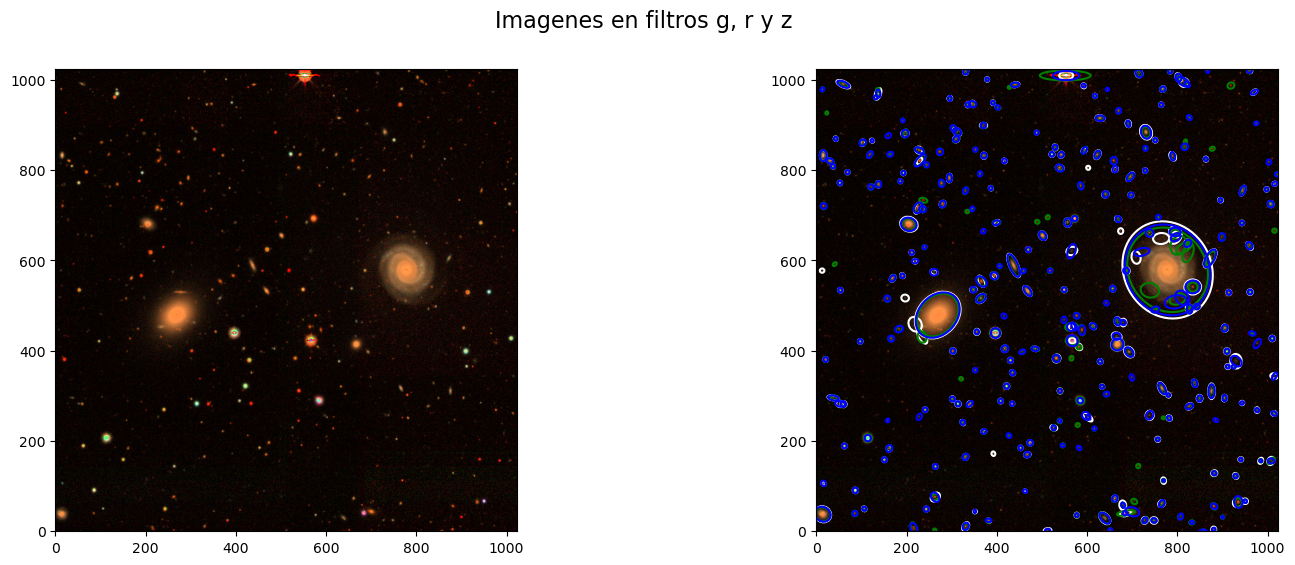

In [17]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
fig.suptitle('Imagenes en filtros g, r y z',x=0.5,fontsize=16)
ax[0].imshow(Estrellas,origin='lower')
ax[1].imshow(Estrellas,origin='lower')
Catg.plot_kron_apertures(ax=ax[1],color='white', lw=1.5)
Catz.plot_kron_apertures(ax=ax[1],color='green', lw=1.5)
Catr.plot_kron_apertures(ax=ax[1],color='blue', lw=1.5)
plt.show()